<a href="https://colab.research.google.com/github/rashokatwal/image-to-music-recommender/blob/main/dataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required libraries

In [1]:
!pip install torch torchvision matplotlib numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Downloading and extracting ADE20K Dataset

In [2]:
import os
import zipfile

# Create a directory for the dataset
os.makedirs("ADE20K", exist_ok=True)

# Download the dataset
!wget -O ADE20K.zip http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip

# Extract the dataset
with zipfile.ZipFile("ADE20K.zip", 'r') as zip_ref:
    zip_ref.extractall("ADE20K")

print("Dataset downloaded and extracted!")

--2025-03-19 16:06:59--  http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.131.233
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip [following]
--2025-03-19 16:07:00--  https://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 967382037 (923M) [application/zip]
Saving to: ‘ADE20K.zip’

ADE20K.zip          100%[===================>] 922.57M  49.1MB/s    in 20s     

2025-03-19 16:07:20 (46.4 MB/s) - ‘ADE20K.zip’ saved [967382037/967382037]

Dataset downloaded and extracted!


Exploring the Dataset

In [48]:
# List files in the dataset
dataset_path = "ADE20K/ADEChallengeData2016"
print("Images:", os.listdir(f"{dataset_path}/images/training"))
print("Annotations:", os.listdir(f"{dataset_path}/annotations/training"))

Images: ['ADE_train_00006741.jpg', 'ADE_train_00012878.jpg', 'ADE_train_00011689.jpg', 'ADE_train_00002351.jpg', 'ADE_train_00013930.jpg', 'ADE_train_00018235.jpg', 'ADE_train_00017095.jpg', 'ADE_train_00015779.jpg', 'ADE_train_00016066.jpg', 'ADE_train_00003052.jpg', 'ADE_train_00010899.jpg', 'ADE_train_00015968.jpg', 'ADE_train_00001447.jpg', 'ADE_train_00006644.jpg', 'ADE_train_00000968.jpg', 'ADE_train_00010036.jpg', 'ADE_train_00012924.jpg', 'ADE_train_00008782.jpg', 'ADE_train_00002718.jpg', 'ADE_train_00010791.jpg', 'ADE_train_00008626.jpg', 'ADE_train_00009837.jpg', 'ADE_train_00001312.jpg', 'ADE_train_00012792.jpg', 'ADE_train_00014959.jpg', 'ADE_train_00003193.jpg', 'ADE_train_00016042.jpg', 'ADE_train_00018875.jpg', 'ADE_train_00009585.jpg', 'ADE_train_00003110.jpg', 'ADE_train_00003380.jpg', 'ADE_train_00007075.jpg', 'ADE_train_00012793.jpg', 'ADE_train_00011894.jpg', 'ADE_train_00008279.jpg', 'ADE_train_00017896.jpg', 'ADE_train_00003820.jpg', 'ADE_train_00000418.jpg', 'AD

Loading and Preprocessing the Data

In [49]:
# Define paths to training data
dataset_path = "ADE20K/ADEChallengeData2016"
train_image_dir = os.path.join(dataset_path, "images/training")
train_annotation_dir = os.path.join(dataset_path, "annotations/training")

# Image transformations
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Mask transformations (use PILToTensor to keep original values)
mask_transform = transforms.Compose([
    transforms.Resize((256, 256), transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor()  # Keeps values as they are (0-255)
])

In [78]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import os
import torchvision.transforms as transforms

class ADE20KDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, image_transform=None, mask_transform=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.image_transform = image_transform
        self.mask_transform = mask_transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        annotation_path = os.path.join(self.annotation_dir, img_name.replace(".jpg", ".png"))

        image = Image.open(img_path).convert("RGB")
        annotation = Image.open(annotation_path).convert("L")  # Load mask as grayscale

        # Apply transformations
        if self.image_transform:
            image = self.image_transform(image)
        if self.mask_transform:
            annotation = self.mask_transform(annotation)

        # Convert mask to long tensor (important for segmentation tasks)
        annotation = annotation.squeeze(0).long()  # Remove extra channel dimension

        return image, annotation

Verifying mask shape and value

In [79]:
# Get a batch of data
images, masks = next(iter(train_loader))

# Check mask shape and values
print("Mask shape:", masks[0].shape)  # Should be [1, 256, 256]
print("Unique mask values:", torch.unique(masks[0]))  # Should be class indices (e.g., 0, 1, 2, ...)

Mask shape: torch.Size([1, 256, 256])
Unique mask values: tensor([ 0,  3, 10, 18, 54])


Opening a mask file

In [80]:
from PIL import Image
import numpy as np

# Path to a mask file
mask_path = "ADE20K/ADEChallengeData2016/annotations/training/ADE_train_00000001.png"

# Open the mask
mask = Image.open(mask_path)
mask = np.array(mask)

# Check unique values
print("Unique mask values:", np.unique(mask))

Unique mask values: [  0   1   4   5   6  13  18  32  33  43  44  88  97 105 126 139 150]


Creating Dataset and Dataloader

In [81]:
# Create dataset
train_dataset = ADE20KDataset(
    train_image_dir,
    train_annotation_dir,
    image_transform=image_transform,
    mask_transform=mask_transform
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Check a batch of data
for images, masks in train_loader:
    print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
    print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
    print("Unique mask values:", torch.unique(masks))  # Should be class indices
    break

Images shape: torch.Size([8, 3, 256, 256])
Masks shape: torch.Size([8, 256, 256])
Unique mask values: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  14,  15,
         16,  18,  22,  23,  25,  28,  29,  31,  33,  37,  40,  41,  44,  48,
         58,  59,  64,  68,  70,  75,  76,  82,  83,  88,  89,  94,  95, 103,
        117, 135, 139, 140, 142, 144, 147])


Visualizing the Data

Images shape: torch.Size([8, 3, 256, 256])
Masks shape: torch.Size([8, 256, 256])
Unique mask values: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  12,  13,  14,  16,
         17,  18,  19,  20,  21,  32,  35,  43,  53,  70,  83,  84,  87,  88,
        103, 120, 135, 139, 144, 150])


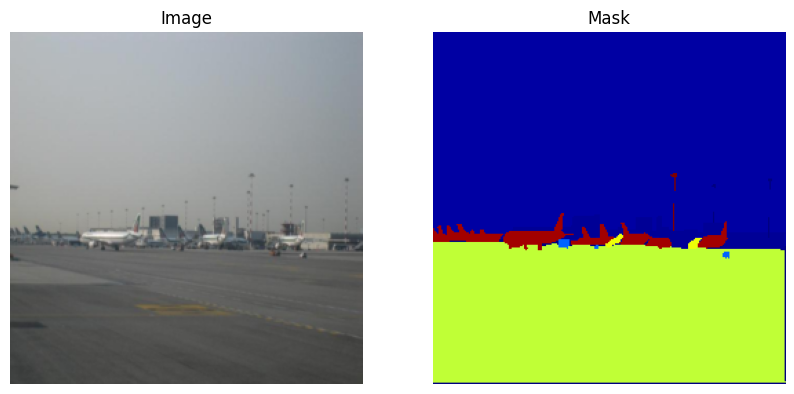

In [82]:
# Check a batch of data
for images, masks in train_loader:
    print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
    print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
    print("Unique mask values:", torch.unique(masks))  # Should be class indices
    break

# Visualization function
def reverse_normalize(image):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return image * std + mean

# Get a batch of data
images, masks = next(iter(train_loader))

# Plot the first image and mask
image = reverse_normalize(images[0]).permute(1, 2, 0).numpy()  # Convert to HWC
mask = masks[0].numpy()  # No need to squeeze

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap="jet")  # Use 'jet' for better visualization
plt.axis("off")

plt.show()

Final code for Data Visualization

Images shape: torch.Size([8, 3, 256, 256])
Masks shape: torch.Size([8, 256, 256])
Unique mask values: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  26,  27,  28,  29,  33,  35,  38,
         53,  60,  67,  68,  82,  88, 103, 125, 136, 143, 150])


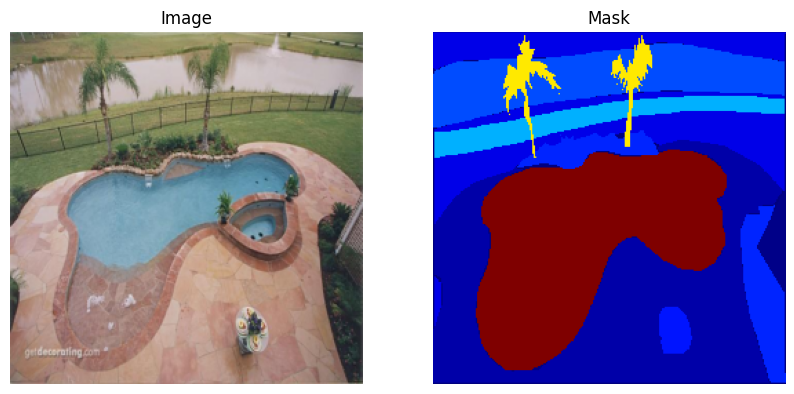

In [83]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define paths to training data
dataset_path = "ADE20K/ADEChallengeData2016"
train_image_dir = os.path.join(dataset_path, "images/training")
train_annotation_dir = os.path.join(dataset_path, "annotations/training")

# Image transformations
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Mask transformations (use PILToTensor to keep original values)
mask_transform = transforms.Compose([
    transforms.Resize((256, 256), transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor()  # Keeps values as they are (0-255)
])

# Dataset class
class ADE20KDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, image_transform=None, mask_transform=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.image_transform = image_transform
        self.mask_transform = mask_transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        annotation_path = os.path.join(self.annotation_dir, img_name.replace(".jpg", ".png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(annotation_path).convert("L")  # Load mask as grayscale

        # Apply transformations
        if self.image_transform:
            image = self.image_transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        # Convert mask to LongTensor and remove extra channel dimension
        mask = mask.squeeze(0).long()

        return image, mask

# Create dataset
train_dataset = ADE20KDataset(
    train_image_dir,
    train_annotation_dir,
    image_transform=image_transform,
    mask_transform=mask_transform
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Check a batch of data
for images, masks in train_loader:
    print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
    print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
    print("Unique mask values:", torch.unique(masks))  # Should be class indices
    break

# Visualization function
def reverse_normalize(image):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return image * std + mean

# Get a batch of data
images, masks = next(iter(train_loader))

# Plot the first image and mask
image = reverse_normalize(images[0]).permute(1, 2, 0).numpy()  # Convert to HWC
mask = masks[0].numpy()  # No need to squeeze

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap="jet")  # Use 'jet' for better visualization
plt.axis("off")

plt.show()


Implementing U-Net in PyTorch

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=150):  # ADE20K has 150 classes
        super(UNet, self).__init__()

        # Encoder (Downsampling Path)
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)

        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)

        # Decoder (Upsampling Path)
        self.upconv4 = self.upconv_block(1024, 512)
        self.decoder4 = self.conv_block(1024, 512)  # 1024 = 512 (upconv) + 512 (skip)
        self.upconv3 = self.upconv_block(512, 256)
        self.decoder3 = self.conv_block(512, 256)  # 512 = 256 (upconv) + 256 (skip)
        self.upconv2 = self.upconv_block(256, 128)
        self.decoder2 = self.conv_block(256, 128)  # 256 = 128 (upconv) + 128 (skip)
        self.upconv1 = self.upconv_block(128, 64)
        self.decoder1 = self.conv_block(128, 64)  # 128 = 64 (upconv) + 64 (skip)

        # Final layer
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def upconv_block(self, in_channels, out_channels):
        return nn.ConvTranspose2d(
            in_channels, out_channels, kernel_size=2, stride=2
        )

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)  # [batch_size, 64, H, W]
        e2 = self.encoder2(F.max_pool2d(e1, kernel_size=2, stride=2))  # [batch_size, 128, H/2, W/2]
        e3 = self.encoder3(F.max_pool2d(e2, kernel_size=2, stride=2))  # [batch_size, 256, H/4, W/4]
        e4 = self.encoder4(F.max_pool2d(e3, kernel_size=2, stride=2))  # [batch_size, 512, H/8, W/8]

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(e4, kernel_size=2, stride=2))  # [batch_size, 1024, H/16, W/16]

        # Decoder with skip connections
        d4 = self.upconv4(bottleneck)  # [batch_size, 512, H/8, W/8]
        d4 = torch.cat((d4, e4), dim=1)  # Skip connection
        d4 = self.decoder4(d4)  # [batch_size, 512, H/8, W/8]

        d3 = self.upconv3(d4)  # [batch_size, 256, H/4, W/4]
        d3 = torch.cat((d3, e3), dim=1)  # Skip connection
        d3 = self.decoder3(d3)  # [batch_size, 256, H/4, W/4]

        d2 = self.upconv2(d3)  # [batch_size, 128, H/2, W/2]
        d2 = torch.cat((d2, e2), dim=1)  # Skip connection
        d2 = self.decoder2(d2)  # [batch_size, 128, H/2, W/2]

        d1 = self.upconv1(d2)  # [batch_size, 64, H, W]
        d1 = torch.cat((d1, e1), dim=1)  # Skip connection
        d1 = self.decoder1(d1)  # [batch_size, 64, H, W]

        # Final layer
        out = self.final_conv(d1)  # [batch_size, out_channels, H, W]
        return out

# Instantiate the model
model = UNet(in_channels=3, out_channels=150)  # ADE20K has 150 classes
print(model)

UNet(
  (encoder1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=T

Defining the Loss Function

In [85]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

Defining the Optimizer

In [86]:
import torch.optim as optim

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate can be adjusted

Moving the Model to GPU

In [87]:
device = torch.device("cpu")  # Force CPU
model = model.to(device)

Debugging

In [71]:
# Check for invalid gradients
# for name, param in model.named_parameters():
#     if param.grad is not None:
#         if torch.any(torch.isnan(param.grad)) or torch.any(torch.isinf(param.grad)):
#             print(f"Invalid gradients found in {name}!")
#             break

Training Loop

In [89]:
# Training loop
num_epochs = 10  # Number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, masks in train_loader:
      images, masks = images.to(device), masks.to(device)

      # Ensure masks are in correct shape
      masks = masks.squeeze(1)  # If the shape is [batch_size, 1, H, W], remove extra dimension

      optimizer.zero_grad()
      outputs = model(images)  # Should have shape [batch_size, num_classes, H, W]

      # Compute loss
      loss = criterion(outputs, masks)  # Ensure masks have shape [batch_size, H, W]

      loss.backward()
      optimizer.step()

    # Print average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
